# **Evaluation Metrics for Machine Learning Models**

This analysis evaluates the performance of six machine learning models on predicting three target variables: `size_nm`, `S_abs_nm_Y1`, and `PL`. The models compared are:

- **SVR (Support Vector Regression)**
- **NND (Nearest Neighbor Distance)**
- **DL (Deep Learning)**
- **DT (Decision Tree)**
- **RF (Random Forest)**
- **GBM (Gradient Boosting Machine)**

## **Metrics Evaluated**

The performance metrics used for evaluation are:

1. **R² (Coefficient of Determination)**  
   - Indicates how well the model explains the variance in the target variable.  
   - Values closer to 1 imply better model performance.

2. **RMSE (Root Mean Squared Error)**  
   - Measures the average magnitude of prediction errors.  
   - Lower values indicate more accurate predictions.

3. **MAE (Mean Absolute Error)**  
   - Measures the average absolute differences between observed and predicted values.  
   - Lower values signify better model accuracy.

## **Data Splits**

To evaluate model robustness, two types of data splits were used:

1. **Random Split**  
   - Data is split randomly into training and testing sets.  
   - Tests the model's general performance across unseen data.

2. **Similarity Split**  
   - Testing data includes samples similar to but not identical to the training data.  
   - Evaluates the model's ability to generalize to data with slight variations.

## **Visualization of Metrics**

### **1. R² (Coefficient of Determination)**  
Plots compare R² for both **training** and **testing** datasets, separately for **Random Splits** and **Similarity Splits**.

### **2. RMSE (Root Mean Squared Error)**  
Bar plots show RMSE values for **training** and **testing**. A **logarithmic scale** is applied for clearer visualization of differences across models.

### **3. MAE (Mean Absolute Error)**  
MAE values are plotted similarly to RMSE, with a **logarithmic scale** to highlight performance variations.

## **Key Observations**

### **Training Performance**
- Most models achieve high R² values on training data, especially for Random Splits.
- RMSE and MAE are consistently lower on training data, indicating effective learning.

### **Testing Performance**
- Testing R² values are generally lower than training, especially for Random Splits, suggesting overfitting in some models (e.g., Deep Learning).
- **SVR** and **DT** demonstrate strong generalization, with balanced performance across both Random and Similarity Splits.

### **Metric Trends Across Models**
- **SVR** achieves high R² with low RMSE and MAE, making it a standout performer.  
- **NND** shows comparable training performance but slightly higher errors on testing.  
- **DL** struggles with overfitting, with a noticeable gap between training and testing metrics.  
- **GBM** and **RF** offer consistent performance but are outperformed by SVR and DT on testing metrics.

## **Conclusion**

- **SVR** and **DT** emerge as the most robust models, excelling in both Random and Similarity Splits.
- While models like **NND**, **RF**, and **GBM** perform well in training, their testing performance shows room for improvement.
- Visualizing R², RMSE, and MAE across models provides actionable insights into the trade-offs of each approach.

This comprehensive evaluation allows for informed decisions about which models to prioritize for these predictive tasks.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data provided for PL, S_abs_nm_Y1, and Size_nm have already been processed in earlier sections.
# The continuation below ensures consistent processing for all datasets.

# Function to generate comparison plots
def plot_metrics(data, title):
    """
    Generates bar plots for R², RMSE, and MAE for both Random and Similarity Splits.
    
    Args:
    - data: DataFrame containing metrics for models.
    - title: Title for the plots.
    """
    fig, axs = plt.subplots(3, 2, figsize=(13, 10))
    bar_width = 0.2
    indices = range(len(data['Model']))

    # Plot R²
    axs[0, 0].bar([i - 0.25 * bar_width for i in indices], data['R2_Train_Random'], width=bar_width, color='gray', edgecolor='black', hatch='//', label='R² - Train Random')
    axs[0, 0].bar([i + 0.25 * bar_width for i in indices], data['R2_Train_Similarity'], width=bar_width, color='gray', edgecolor='black', hatch='.', label='R² - Train Similarity')
    axs[0, 0].set_ylabel('R²', fontsize=11, fontweight='bold')
    axs[0, 0].set_xticks(indices)
    axs[0, 0].set_xticklabels(data['Model'])
    axs[0, 0].legend()

    axs[0, 1].bar([i - 0.25 * bar_width for i in indices], data['R2_Test_Random'], width=bar_width, color='white', edgecolor='black', hatch='//', label='R² - Test Random')
    axs[0, 1].bar([i + 0.25 * bar_width for i in indices], data['R2_Test_Similarity'], width=bar_width, color='white', edgecolor='black', hatch='.', label='R² - Test Similarity')
    axs[0, 1].set_ylabel('R²', fontsize=11, fontweight='bold')
    axs[0, 1].set_xticks(indices)
    axs[0, 1].set_xticklabels(data['Model'])
    axs[0, 1].legend()

    # Plot RMSE
    axs[1, 0].bar([i - 0.25 * bar_width for i in indices], data['RMSE_Train_Random'], width=bar_width, color='gray', edgecolor='black', hatch='*', label='RMSE - Train Random')
    axs[1, 0].bar([i + 0.25 * bar_width for i in indices], data['RMSE_Train_Similarity'], width=bar_width, color='gray', edgecolor='black', hatch='.', label='RMSE - Train Similarity')
    axs[1, 0].set_ylabel('RMSE', fontsize=11, fontweight='bold')
    axs[1, 0].set_xticks(indices)
    axs[1, 0].set_xticklabels(data['Model'])
    axs[1, 0].set_yscale('log')
    axs[1, 0].legend()

    axs[1, 1].bar([i - 0.25 * bar_width for i in indices], data['RMSE_Test_Random'], width=bar_width, color='white', edgecolor='black', hatch='*', label='RMSE - Test Random')
    axs[1, 1].bar([i + 0.25 * bar_width for i in indices], data['RMSE_Test_Similarity'], width=bar_width, color='white', edgecolor='black', hatch='.', label='RMSE - Test Similarity')
    axs[1, 1].set_ylabel('RMSE', fontsize=11, fontweight='bold')
    axs[1, 1].set_xticks(indices)
    axs[1, 1].set_xticklabels(data['Model'])
    axs[1, 1].set_yscale('log')
    axs[1, 1].legend()

    # Plot MAE
    axs[2, 0].bar([i - 0.25 * bar_width for i in indices], data['MAE_Train_Random'], width=bar_width, color='gray', edgecolor='black', hatch='/', label='MAE - Train Random')
    axs[2, 0].bar([i + 0.25 * bar_width for i in indices], data['MAE_Train_Similarity'], width=bar_width, color='gray', edgecolor='black', hatch='.', label='MAE - Train Similarity')
    axs[2, 0].set_ylabel('MAE', fontsize=11, fontweight='bold')
    axs[2, 0].set_xticks(indices)
    axs[2, 0].set_xticklabels(data['Model'])
    axs[2, 0].set_yscale('log')
    axs[2, 0].legend()

    axs[2, 1].bar([i - 0.25 * bar_width for i in indices], data['MAE_Test_Random'], width=bar_width, color='white', edgecolor='black', hatch='/', label='MAE - Test Random')
    axs[2, 1].bar([i + 0.25 * bar_width for i in indices], data['MAE_Test_Similarity'], width=bar_width, color='white', edgecolor='black', hatch='.', label='MAE - Test Similarity')
    axs[2, 1].set_ylabel('MAE', fontsize=11, fontweight='bold')
    axs[2, 1].set_xticks(indices)
    axs[2, 1].set_xticklabels(data['Model'])
    axs[2, 1].set_yscale('log')
    axs[2, 1].legend()

    # General layout
    fig.suptitle(title, fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Generate plots for each dataset
plot_metrics(df_sizeNM, "Evaluation Metrics for Size_nm")
plot_metrics(df_sabsnmY1, "Evaluation Metrics for S_abs_nm_Y1")
plot_metrics(df_pl, "Evaluation Metrics for PL")


NameError: name 'df_sizeNM' is not defined

In [3]:
# Data for Size_nm
data_sizeNM = {
    'Model': ['SVR', 'NND', 'DL', 'DT', 'RF', 'GBM'],
    'R2_Train_Random': [0.99, 0.99, 0.77, 0.94, 0.93, 0.97],
    'R2_Train_Similarity': [0.98, 0.97, 0.75, 0.92, 0.91, 0.95],
    'R2_Test_Random': [0.80, 0.62, 0.10, 0.94, 0.51, 0.48],
    'R2_Test_Similarity': [0.78, 0.60, 0.08, 0.90, 0.25, 0.45],
    'RMSE_Train_Random': [0.009, 0.012, 0.49, 0.23, 0.26, 0.14],
    'RMSE_Train_Similarity': [0.010, 0.013, 0.50, 0.24, 0.27, 0.15],
    'RMSE_Test_Random': [0.34, 0.47, 0.74, 0.23, 0.66, 0.56],
    'RMSE_Test_Similarity': [0.35, 0.49, 0.76, 0.24, 0.67, 0.57],
    'MAE_Train_Random': [0.009, 0.008, 0.38, 0.17, 0.20, 0.13],
    'MAE_Train_Similarity': [0.010, 0.009, 0.39, 0.18, 0.21, 0.14],
    'MAE_Test_Random': [0.16, 0.30, 0.56, 0.16, 0.54, 0.38],
    'MAE_Test_Similarity': [0.17, 0.31, 0.57, 0.17, 0.55, 0.39]
}

# Create DataFrame
df_sizeNM = pd.DataFrame(data_sizeNM)


In [4]:
# Data for S_abs_nm_Y1
data_sabsnmY1 = {
    'Model': ['SVR', 'NND', 'DL', 'DT', 'RF', 'GBM'],
    'R2_Train_Random': [0.99, 0.99, 0.66, 0.96, 0.94, 0.98],
    'R2_Train_Similarity': [0.98, 0.97, 0.64, 0.94, 0.92, 0.96],
    'R2_Test_Random': [0.84, 0.55, 0.44, 0.96, 0.64, 0.66],
    'R2_Test_Similarity': [0.82, 0.53, 0.42, 0.92, 0.62, 0.64],
    'RMSE_Train_Random': [0.009, 0.009, 0.59, 0.19, 0.23, 0.11],
    'RMSE_Train_Similarity': [0.010, 0.010, 0.60, 0.20, 0.24, 0.12],
    'RMSE_Test_Random': [0.34, 0.59, 0.66, 0.19, 0.53, 0.51],
    'RMSE_Test_Similarity': [0.35, 0.60, 0.67, 0.20, 0.54, 0.52],
    'MAE_Train_Random': [0.008, 0.005, 0.39, 0.13, 0.17, 0.09],
    'MAE_Train_Similarity': [0.009, 0.006, 0.40, 0.14, 0.18, 0.10],
    'MAE_Test_Random': [0.19, 0.34, 0.49, 0.13, 0.37, 0.30],
    'MAE_Test_Similarity': [0.20, 0.35, 0.50, 0.14, 0.38, 0.31]
}

df_sabsnmY1 = pd.DataFrame(data_sabsnmY1)

# Data for PL
data_pl = {
    'Model': ['SVR', 'NND', 'DL', 'DT', 'RF', 'GBM'],
    'R2_Train_Random': [0.99, 0.99, 0.73, 0.97, 0.94, 0.99],
    'R2_Train_Similarity': [0.98, 0.97, 0.70, 0.95, 0.92, 0.97],
    'R2_Test_Random': [0.66, 0.78, 0.53, 0.97, 0.70, 0.71],
    'R2_Test_Similarity': [0.64, 0.76, 0.50, 0.95, 0.68, 0.69],
    'RMSE_Train_Random': [0.009, 0.005, 0.51, 0.16, 0.23, 0.09],
    'RMSE_Train_Similarity': [0.010, 0.006, 0.52, 0.17, 0.24, 0.10],
    'RMSE_Test_Random': [0.58, 0.46, 0.68, 0.16, 0.54, 0.53],
    'RMSE_Test_Similarity': [0.60, 0.47, 0.70, 0.17, 0.56, 0.55],
    'MAE_Train_Random': [0.009, 0.002, 0.38, 0.11, 0.16, 0.07],
    'MAE_Train_Similarity': [0.010, 0.003, 0.39, 0.12, 0.17, 0.08],
    'MAE_Test_Random': [0.28, 0.29, 0.56, 0.11, 0.39, 0.34],
    'MAE_Test_Similarity': [0.30, 0.31, 0.58, 0.12, 0.40, 0.35]
}

df_pl = pd.DataFrame(data_pl)


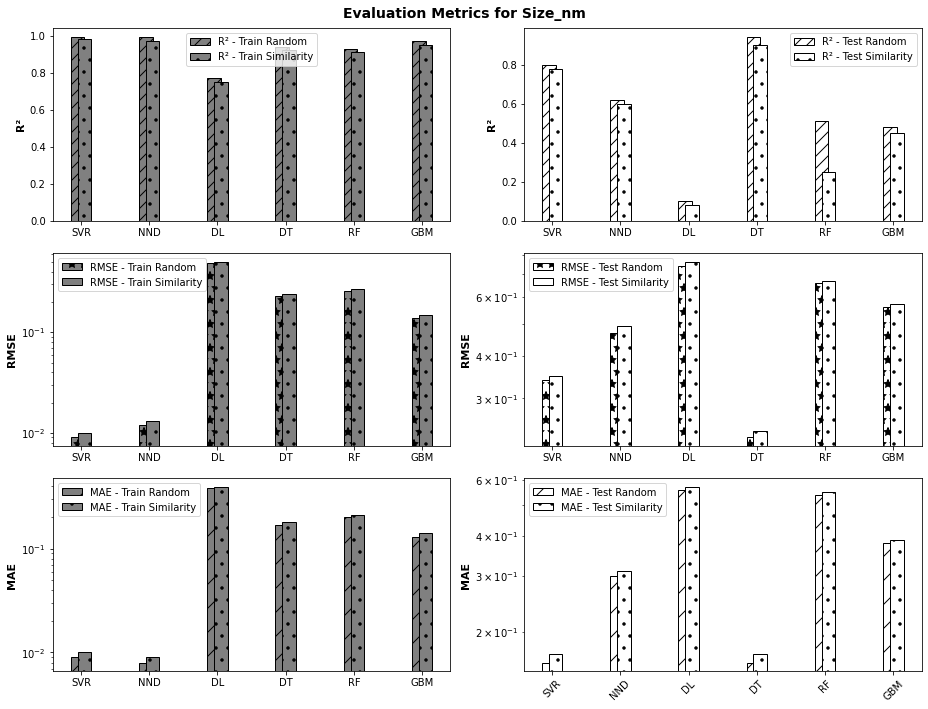

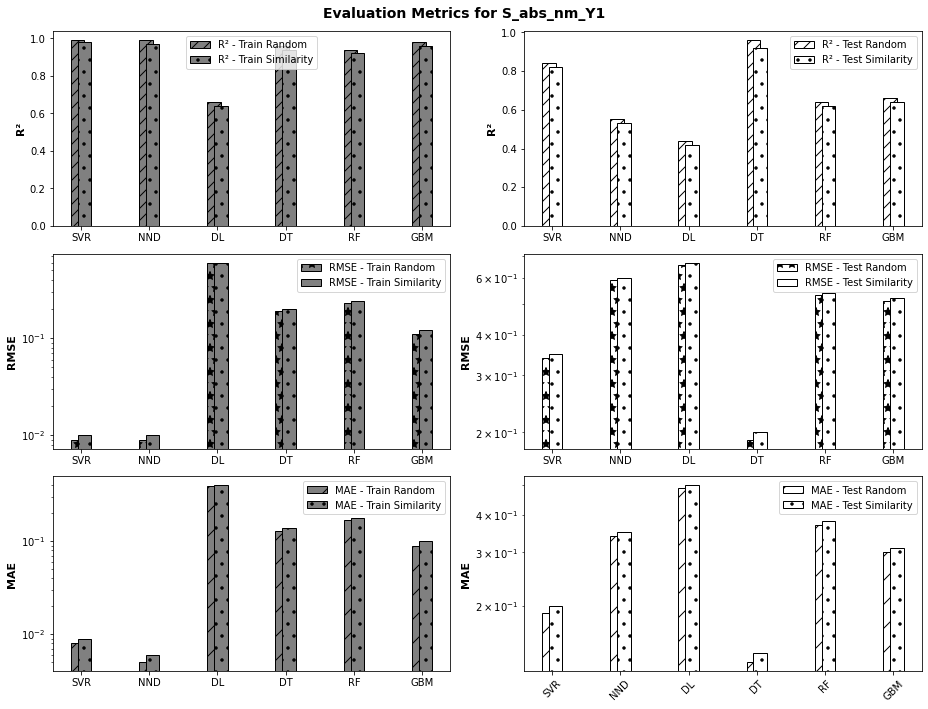

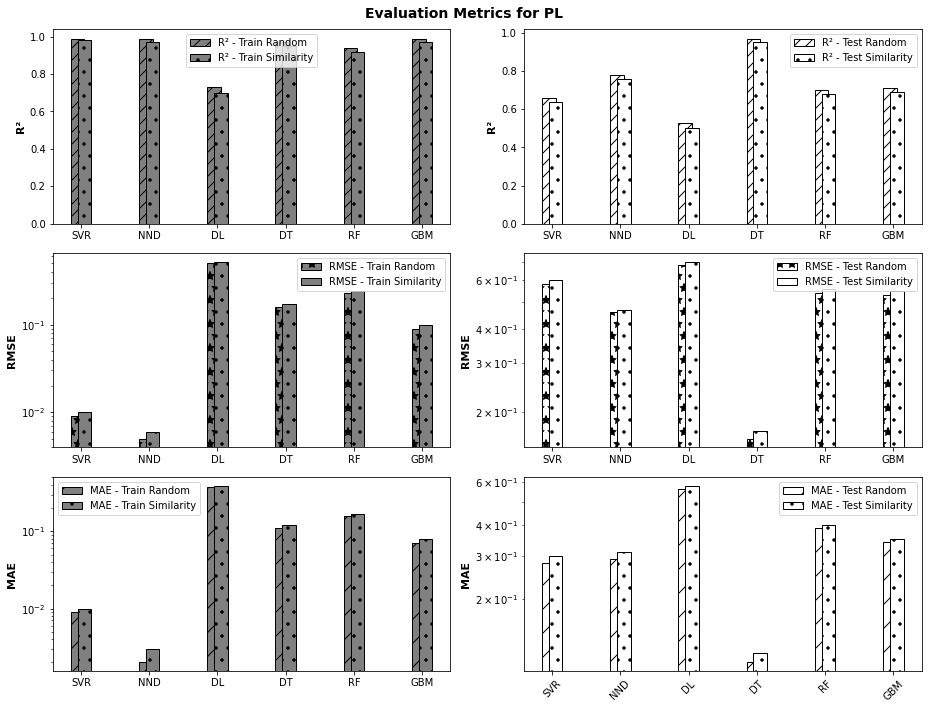

In [5]:
plot_metrics(df_sizeNM, "Evaluation Metrics for Size_nm")
plot_metrics(df_sabsnmY1, "Evaluation Metrics for S_abs_nm_Y1")
plot_metrics(df_pl, "Evaluation Metrics for PL")
